<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">PROJECT: Rainfall Weather Forecasting </span>


<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">BATCH NUMBER : DS2309</span>

<span style="color:RED;font-size: 22px;font-family: verdana;font-weight: bold ">NAME: ABHISHEK AGNIHOTRI</span>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import boxcox
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOADING DATASET</span>

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [4]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [5]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8420,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
8424,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


In [6]:
df.sample(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
3786,2016-02-09,Williamtown,18.3,27.3,0.2,4.2,10.0,SSE,35.0,SSE,...,67.0,63.0,1020.0,1018.9,5.0,3.0,24.0,26.2,No,No
550,2010-06-04,Albury,3.1,18.4,0.0,NaN,NaN,W,19.0,NaN,...,82.0,53.0,1023.6,1019.4,NaN,NaN,8.7,18.1,No,No
7666,2013-01-31,PerthAirport,17.1,34.8,0.0,11.2,13.0,ESE,65.0,ENE,...,41.0,13.0,1023.0,1019.3,1.0,3.0,22.9,33.7,No,No
7337,2012-02-06,PerthAirport,15.4,29.6,0.0,9.0,12.8,E,63.0,ENE,...,45.0,24.0,1017.6,1013.4,1.0,5.0,20.5,29.4,No,No
7866,2013-09-16,PerthAirport,5.9,21.8,0.0,1.6,7.0,NNW,81.0,N,...,67.0,56.0,1013.9,1007.7,5.0,8.0,14.9,19.3,No,Yes
2746,2015-06-30,Penrith,5.9,17.6,0.4,NaN,NaN,N,11.0,NaN,...,98.0,65.0,NaN,NaN,NaN,NaN,7.2,16.9,No,Yes
5462,2010-02-13,Melbourne,18.2,21.3,0.0,2.8,0.1,SSW,31.0,SSW,...,83.0,76.0,1011.9,1010.4,8.0,7.0,18.9,20.8,No,Yes
3819,2016-03-13,Williamtown,20.6,30.8,0.0,20.6,8.9,E,43.0,NE,...,64.0,52.0,1020.0,1016.8,5.0,7.0,25.0,29.6,No,No
4318,2008-12-30,Wollongong,16.4,27.7,2.6,NaN,NaN,NW,41.0,N,...,78.0,77.0,1004.1,999.6,7.0,6.0,19.9,22.4,Yes,No
4283,2017-06-20,Williamtown,11.6,19.8,0.0,NaN,NaN,S,33.0,WSW,...,97.0,73.0,1027.3,1024.6,8.0,NaN,14.8,18.7,No,No


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [8]:
df.shape

(8425, 23)

In [9]:
df.isnull().sum()

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
dtype: int64

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">CATEGORICAL DATA HAVING NULL VALUE</span>

In [10]:
for i in df.columns:
    if df[i].dtypes=='O':
        print(f" Categorical Column: {i}, Null Count: {df[i].isnull().sum()}")
   

 Categorical Column: Date, Null Count: 0
 Categorical Column: Location, Null Count: 0
 Categorical Column: WindGustDir, Null Count: 991
 Categorical Column: WindDir9am, Null Count: 829
 Categorical Column: WindDir3pm, Null Count: 308
 Categorical Column: RainToday, Null Count: 240
 Categorical Column: RainTomorrow, Null Count: 239


In [11]:
for i in df.columns:
    if df[i].dtypes=='float64':
        print(f" Numerical Column: {i}, Null Count: {df[i].isnull().sum()}")

 Numerical Column: MinTemp, Null Count: 75
 Numerical Column: MaxTemp, Null Count: 60
 Numerical Column: Rainfall, Null Count: 240
 Numerical Column: Evaporation, Null Count: 3512
 Numerical Column: Sunshine, Null Count: 3994
 Numerical Column: WindGustSpeed, Null Count: 991
 Numerical Column: WindSpeed9am, Null Count: 76
 Numerical Column: WindSpeed3pm, Null Count: 107
 Numerical Column: Humidity9am, Null Count: 59
 Numerical Column: Humidity3pm, Null Count: 102
 Numerical Column: Pressure9am, Null Count: 1309
 Numerical Column: Pressure3pm, Null Count: 1312
 Numerical Column: Cloud9am, Null Count: 2421
 Numerical Column: Cloud3pm, Null Count: 2455
 Numerical Column: Temp9am, Null Count: 56
 Numerical Column: Temp3pm, Null Count: 96


In [12]:
df1=df.copy()

In [13]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,8350.000000,8365.000000,8185.000000,4913.000000,4431.000000,7434.000000,8349.000000,8318.000000,8366.000000,8323.000000,7116.000000,7113.000000,6004.000000,5970.000000,8369.000000,8329.000000
mean,13.193305,23.859976,2.805913,5.389395,7.632205,40.174469,13.847646,18.533662,67.822496,51.249790,1017.640233,1015.236075,4.566622,4.503183,17.762015,22.442934
std,5.403596,6.136408,10.459379,5.044484,3.896235,14.665721,10.174579,9.766986,16.833283,18.423774,6.828699,6.766681,2.877658,2.731659,5.627035,5.980020
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,989.800000,982.900000,0.000000,0.000000,1.900000,7.300000
25%,9.200000,19.300000,0.000000,2.600000,4.750000,30.000000,6.000000,11.000000,56.000000,39.000000,1013.000000,1010.400000,1.000000,2.000000,13.800000,18.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.300000,5.000000,5.000000,17.800000,21.900000
75%,17.400000,28.000000,1.000000,7.000000,10.700000,50.000000,20.000000,24.000000,80.000000,63.000000,1022.300000,1019.800000,7.000000,7.000000,21.900000,26.400000
max,28.500000,45.500000,371.000000,145.000000,13.900000,107.000000,63.000000,83.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000


In [14]:
df.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
MinTemp,1.000000,0.720955,0.091642,0.348643,0.081365,0.241317,0.137263,0.180091,-0.130906,0.079569,-0.465478,-0.458665,0.111213,0.046889,0.888342,0.689652
MaxTemp,0.720955,1.000000,-0.088906,0.424728,0.523909,0.146113,0.013425,0.088797,-0.392496,-0.424217,-0.347285,-0.430074,-0.307700,-0.301675,0.869503,0.978665
Rainfall,0.091642,-0.088906,1.000000,0.043463,-0.209654,0.104999,0.051349,0.025185,0.231702,0.238730,-0.080412,-0.037270,0.195157,0.159250,-0.007191,-0.092263
Evaporation,0.348643,0.424728,0.043463,1.000000,0.340893,0.214069,0.176701,0.142421,-0.286869,-0.221244,-0.218171,-0.233401,-0.084288,-0.152637,0.405467,0.414156
Sunshine,0.081365,0.523909,-0.209654,0.340893,1.000000,-0.018455,-0.025112,0.045031,-0.512349,-0.630536,0.028666,-0.047098,-0.705577,-0.723957,0.348708,0.546057
WindGustSpeed,0.241317,0.146113,0.104999,0.214069,-0.018455,1.000000,0.656079,0.711403,-0.286045,-0.097380,-0.430736,-0.394745,0.030124,0.104157,0.211477,0.106872
WindSpeed9am,0.137263,0.013425,0.051349,0.176701,-0.025112,0.656079,1.000000,0.566322,-0.358981,-0.111595,-0.197189,-0.156517,-0.000607,0.068930,0.109936,-0.002619
WindSpeed3pm,0.180091,0.088797,0.025185,0.142421,0.045031,0.711403,0.566322,1.000000,-0.252488,-0.091248,-0.291271,-0.240378,0.005807,0.003894,0.185329,0.066201
Humidity9am,-0.130906,-0.392496,0.231702,-0.286869,-0.512349,-0.286045,-0.358981,-0.252488,1.000000,0.636255,0.154699,0.188463,0.472126,0.352736,-0.378389,-0.383788
Humidity3pm,0.079569,-0.424217,0.238730,-0.221244,-0.630536,-0.097380,-0.111595,-0.091248,0.636255,1.000000,0.001763,0.076002,0.509797,0.520221,-0.130973,-0.491634


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">IMPUTATION OF DATA</span>

In [15]:
from sklearn.impute import SimpleImputer

# Assuming 'df1' is DataFrame and 'columns_to_impute' is the list of columns

# Separate columns into numerical and categorical
num_col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm']
cat_col=['WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']

# Impute numerical columns with mean
num_imputer = SimpleImputer(strategy='mean')
df1[num_col] = num_imputer.fit_transform(df1[num_col])

# Impute categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
df1[cat_col] = cat_imputer.fit_transform(df1[cat_col])


In [24]:
df1[num_col]

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,5.389395,7.632205,44.000000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8
1,7.4,25.100000,0.0,5.389395,7.632205,44.000000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3
2,12.9,25.700000,0.0,5.389395,7.632205,46.000000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2
3,9.2,28.000000,0.0,5.389395,7.632205,24.000000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5
4,17.5,32.300000,1.0,5.389395,7.632205,41.000000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2.8,23.400000,0.0,5.389395,7.632205,31.000000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4
8421,3.6,25.300000,0.0,5.389395,7.632205,22.000000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5
8422,5.4,26.900000,0.0,5.389395,7.632205,37.000000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1
8423,7.8,27.000000,0.0,5.389395,7.632205,28.000000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0


In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8425 non-null   float64
 3   MaxTemp        8425 non-null   float64
 4   Rainfall       8425 non-null   float64
 5   Evaporation    8425 non-null   float64
 6   Sunshine       8425 non-null   float64
 7   WindGustDir    8425 non-null   object 
 8   WindGustSpeed  8425 non-null   float64
 9   WindDir9am     8425 non-null   object 
 10  WindDir3pm     8425 non-null   object 
 11  WindSpeed9am   8425 non-null   float64
 12  WindSpeed3pm   8425 non-null   float64
 13  Humidity9am    8425 non-null   float64
 14  Humidity3pm    8425 non-null   float64
 15  Pressure9am    8425 non-null   float64
 16  Pressure3pm    8425 non-null   float64
 17  Cloud9am       8425 non-null   float64
 18  Cloud3pm

In [17]:
df1.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

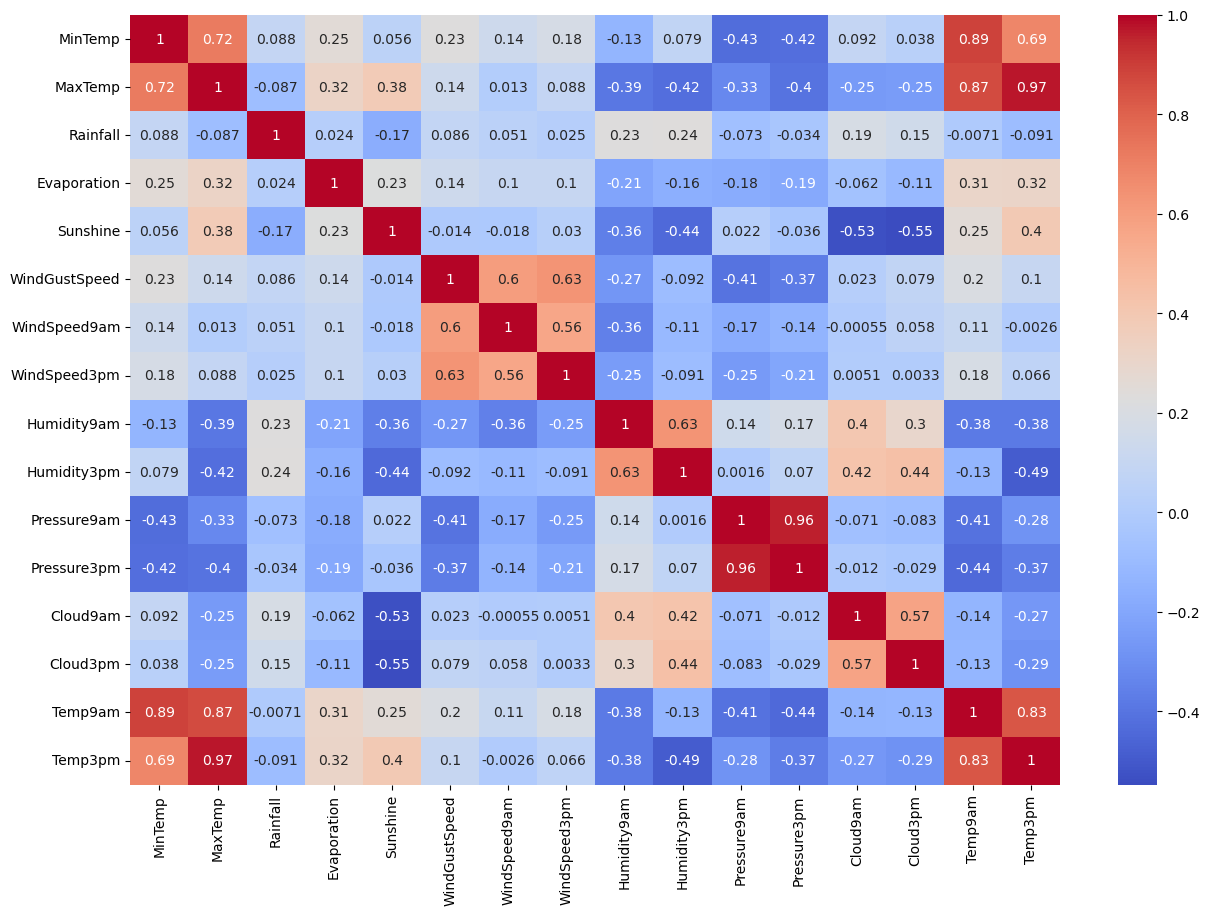

In [18]:
plt.figure(figsize=(15,10), facecolor='w')
sns.heatmap(df1.corr(), annot=True, cmap='coolwarm')
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">UNIQUE VALUES IN Categorical Data </span>

In [28]:
for i in df1.columns:
    if df1[i].dtypes=='O':
        print(f" Categorical Column: {i}, Unique vale Count: {(df[i].nunique())}")

 Categorical Column: Date, Unique vale Count: 3004
 Categorical Column: Location, Unique vale Count: 12
 Categorical Column: WindGustDir, Unique vale Count: 16
 Categorical Column: WindDir9am, Unique vale Count: 16
 Categorical Column: WindDir3pm, Unique vale Count: 16
 Categorical Column: RainToday, Unique vale Count: 2
 Categorical Column: RainTomorrow, Unique vale Count: 2


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:Correlation of Categorical Data </span>

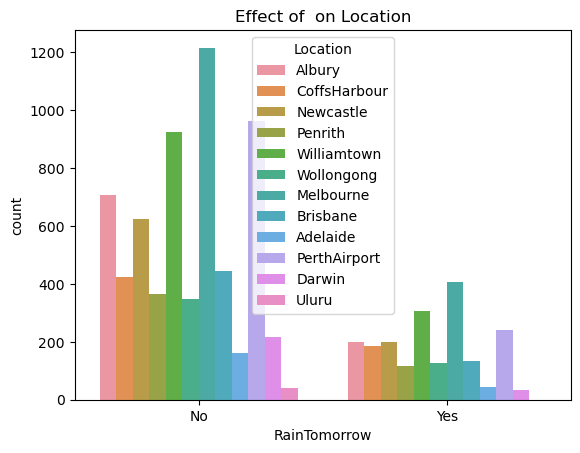

In [20]:
sns.countplot(x='RainTomorrow', hue='Location', data=df1)
plt.title("Effect of  on Location")
plt.show()

In [21]:
df1

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.6,5.389395,7.632205,W,44.000000,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.0,5.389395,7.632205,WNW,44.000000,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.0,5.389395,7.632205,WSW,46.000000,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.0,5.389395,7.632205,NE,24.000000,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,1.0,5.389395,7.632205,W,41.000000,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.0,5.389395,7.632205,E,31.000000,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.0,5.389395,7.632205,NNW,22.000000,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.0,5.389395,7.632205,N,37.000000,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.0,5.389395,7.632205,SE,28.000000,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CHECKING SKEWNESS </span>

In [22]:
df1.skew()

MinTemp          -0.089989
MaxTemp           0.380654
Rainfall         13.218403
Evaporation      14.023948
Sunshine         -0.716525
WindGustSpeed     0.757000
WindSpeed9am      0.960591
WindSpeed3pm      0.494217
Humidity9am      -0.256743
Humidity3pm       0.118281
Pressure9am      -0.024082
Pressure3pm      -0.010214
Cloud9am         -0.366503
Cloud3pm         -0.276294
Temp9am          -0.014748
Temp3pm           0.397331
dtype: float64

In [26]:
from scipy.stats import boxcox


for i in df1[num_col].columns:
    skewness = df1[i].skew()
    
    if skewness > 0.5:
        # Add a constant to make the data positive
        min_value = df1[i].min()
        if min_value <= 0:
            constant = abs(min_value) + 1
            df1[i] = df1[i] + constant
        
        # Apply Box-Cox transformation
        df1[i], _ = boxcox(df1[i])


In [27]:
df1.skew()

MinTemp         -0.089989
MaxTemp          0.380654
Rainfall         0.904387
Evaporation      0.080305
Sunshine        -0.716525
WindGustSpeed    0.011803
WindSpeed9am    -0.079333
WindSpeed3pm     0.494217
Humidity9am     -0.256743
Humidity3pm      0.118281
Pressure9am     -0.024082
Pressure3pm     -0.010214
Cloud9am        -0.366503
Cloud3pm        -0.276294
Temp9am         -0.014748
Temp3pm          0.397331
dtype: float64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:AFTER CORRECTION OF SKEWNESS </span>

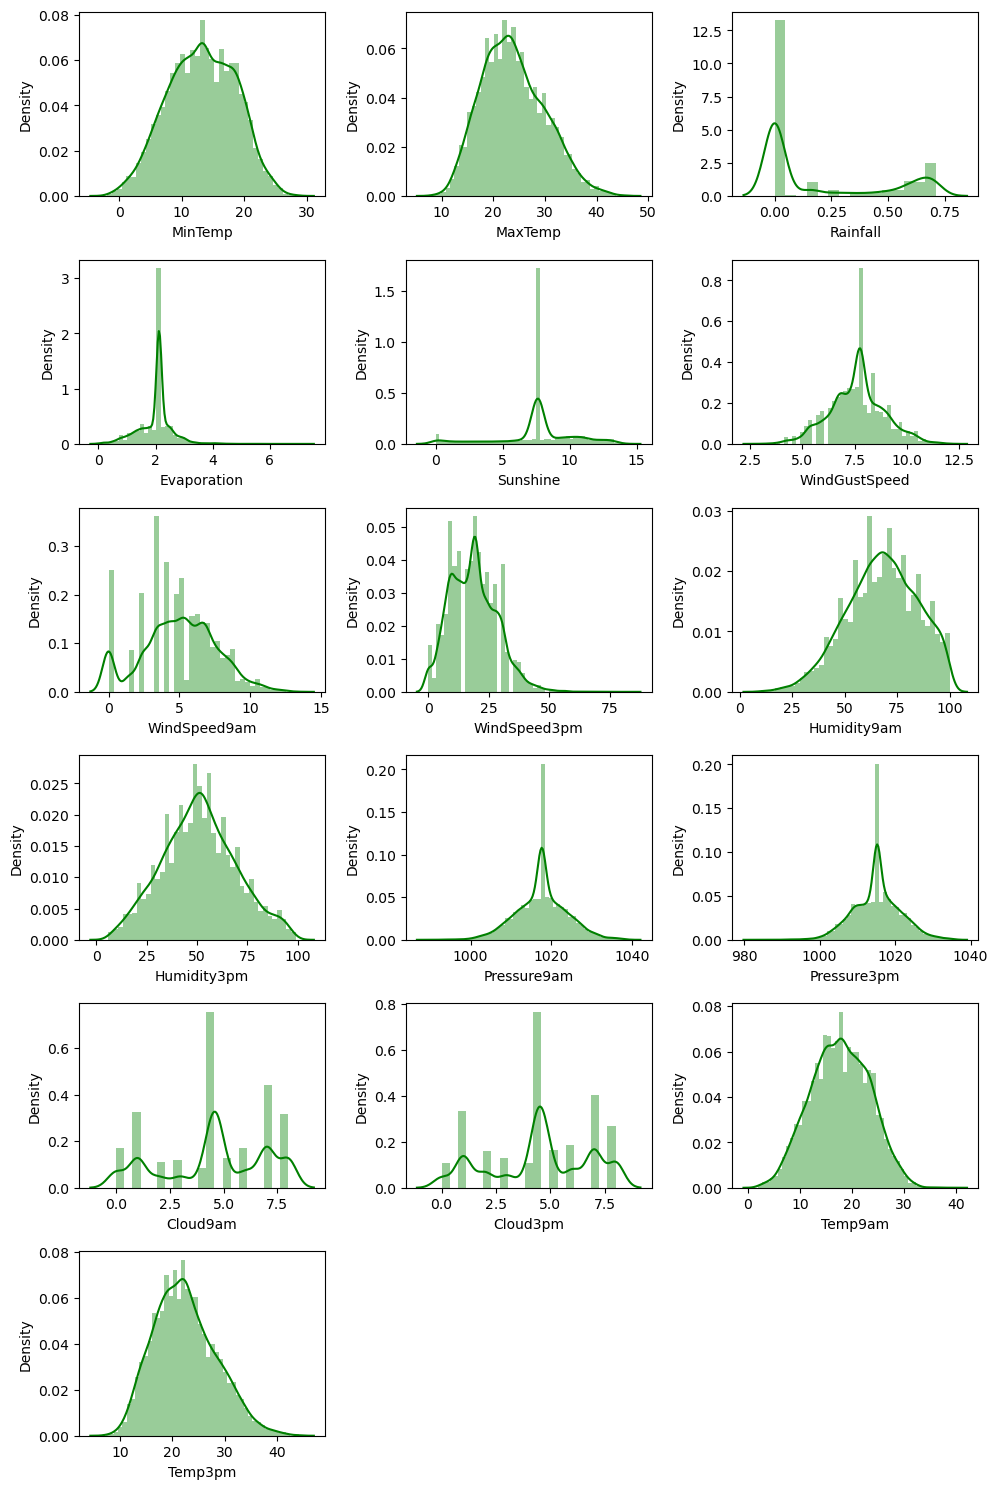

In [29]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df1.columns:
        if df1[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 18:
                plt.subplot(6, 3, pltnum)
                sns.distplot(df1[i], color='g')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISUALIZATION:OUTLIER IN DATASET-BOXPLOTS</span>

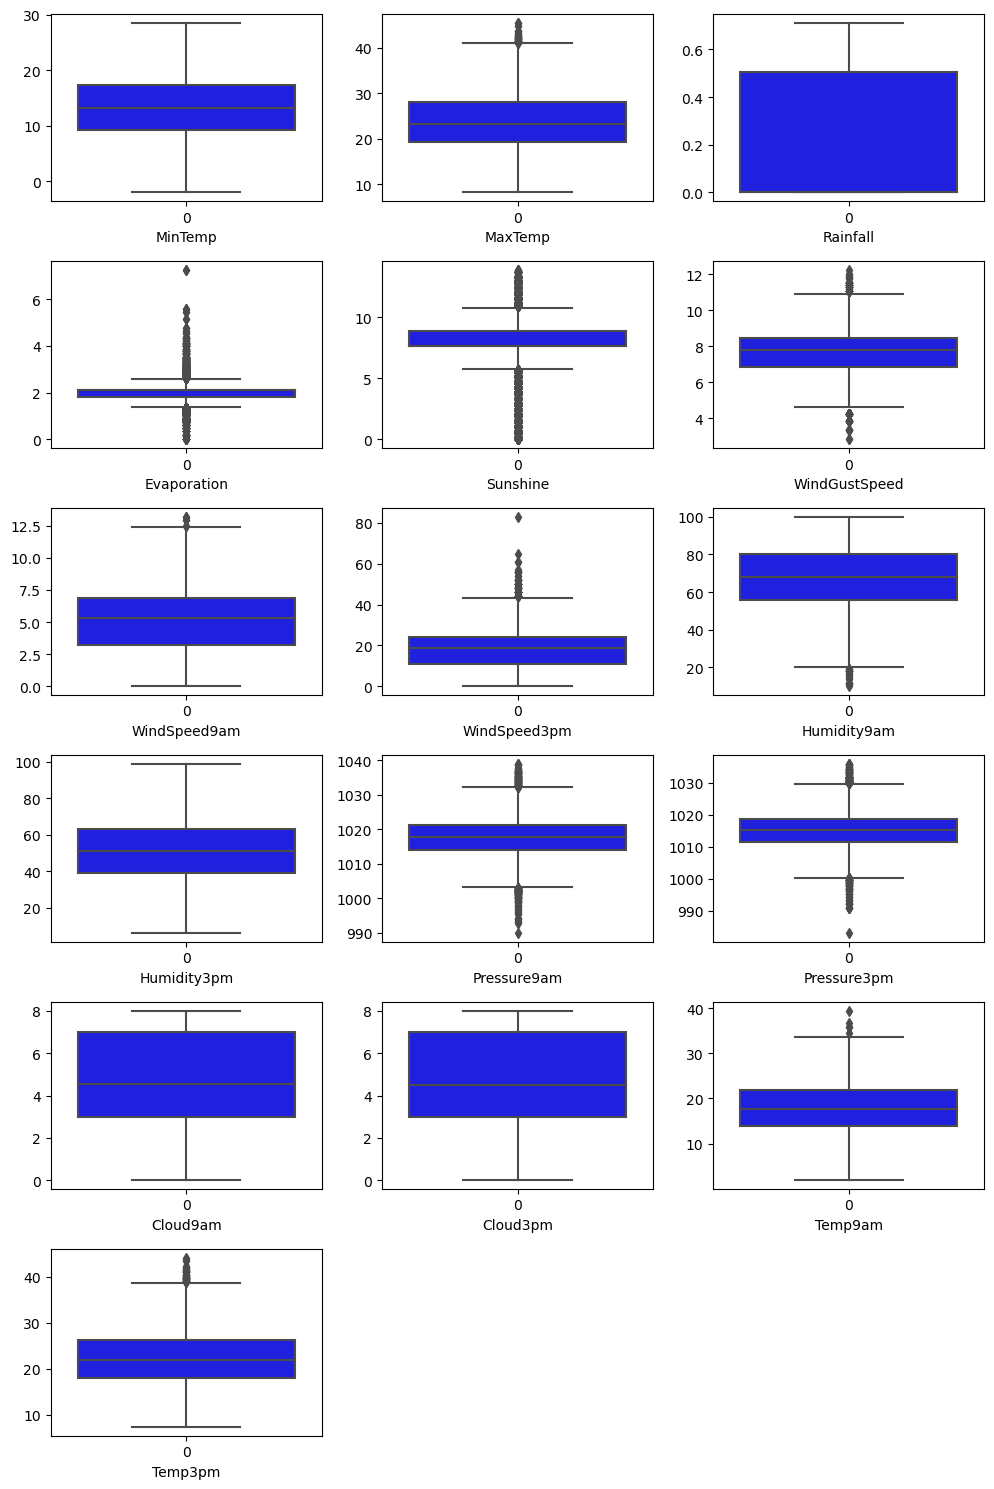

In [31]:
plt.figure(figsize=(10, 15), facecolor='w')
pltnum = 1

for i in df1.columns:
        if df1[i].dtypes in ['int64', 'float64']:  
 
            if pltnum < 18:
                plt.subplot(6, 3, pltnum)
                sns.boxplot(df1[i], color='b')
                plt.xlabel(i)
                pltnum += 1

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [32]:
from scipy.stats import zscore

# Iterate over columns in the DataFrame
for i in df1.columns:
    # Check if the column is of type 'int64' or 'float64'
    if df1[i].dtypes in ['int64', 'float64']:
        # Calculate z-scores for the current column
        z_score = zscore(df1[i])
        
        # Identify and filter out outliers using z-scores
        outliers = (np.abs(z_score) > 3)
        df1 = df1[~outliers]

# Display the DataFrame after removing outliers
print(df1)


            Date Location  MinTemp    MaxTemp  Rainfall  Evaporation  \
0     2008-12-01   Albury     13.4  22.900000  0.344040     2.122536   
1     2008-12-02   Albury      7.4  25.100000  0.000000     2.122536   
2     2008-12-03   Albury     12.9  25.700000  0.000000     2.122536   
3     2008-12-04   Albury      9.2  28.000000  0.000000     2.122536   
4     2008-12-05   Albury     17.5  32.300000  0.443032     2.122536   
...          ...      ...      ...        ...       ...          ...   
8420  2017-06-21    Uluru      2.8  23.400000  0.000000     2.122536   
8421  2017-06-22    Uluru      3.6  25.300000  0.000000     2.122536   
8422  2017-06-23    Uluru      5.4  26.900000  0.000000     2.122536   
8423  2017-06-24    Uluru      7.8  27.000000  0.000000     2.122536   
8424  2017-06-25    Uluru     14.9  23.859976  0.000000     2.122536   

      Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  \
0     7.632205           W       8.108191          W  ...     

In [34]:
df2=df1.copy()

In [35]:
df2

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.900000,0.344040,2.122536,7.632205,W,8.108191,W,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.100000,0.000000,2.122536,7.632205,WNW,8.108191,NNW,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.700000,0.000000,2.122536,7.632205,WSW,8.284547,W,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.000000,0.000000,2.122536,7.632205,NE,5.966331,SE,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.300000,0.443032,2.122536,7.632205,W,7.833797,ENE,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,2017-06-21,Uluru,2.8,23.400000,0.000000,2.122536,7.632205,E,6.813755,SE,...,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,No,No
8421,2017-06-22,Uluru,3.6,25.300000,0.000000,2.122536,7.632205,NNW,5.695655,SE,...,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,No,No
8422,2017-06-23,Uluru,5.4,26.900000,0.000000,2.122536,7.632205,N,7.447225,SE,...,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,No,No
8423,2017-06-24,Uluru,7.8,27.000000,0.000000,2.122536,7.632205,SE,6.467309,SSE,...,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,No,No


In [36]:
df2 = df2.drop('Date', axis=1)


In [39]:
df2.shape

(8126, 22)

In [40]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8126 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8126 non-null   object 
 1   MinTemp        8126 non-null   float64
 2   MaxTemp        8126 non-null   float64
 3   Rainfall       8126 non-null   float64
 4   Evaporation    8126 non-null   float64
 5   Sunshine       8126 non-null   float64
 6   WindGustDir    8126 non-null   object 
 7   WindGustSpeed  8126 non-null   float64
 8   WindDir9am     8126 non-null   object 
 9   WindDir3pm     8126 non-null   object 
 10  WindSpeed9am   8126 non-null   float64
 11  WindSpeed3pm   8126 non-null   float64
 12  Humidity9am    8126 non-null   float64
 13  Humidity3pm    8126 non-null   float64
 14  Pressure9am    8126 non-null   float64
 15  Pressure3pm    8126 non-null   float64
 16  Cloud9am       8126 non-null   float64
 17  Cloud3pm       8126 non-null   float64
 18  Temp9am 

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">IMPLEMENTATION OF LABEL ENCODING</span>

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Specify the columns to encode
columns_to_encode=['Location','WindGustDir','WindDir9am','WindDir3pm','RainToday','RainTomorrow']
# Apply LabelEncoder to each specified column in the original DataFrame
df2[columns_to_encode] = df2[columns_to_encode].apply(lambda col: le.fit_transform(col))

# Display the modified DataFrame
df2.head(15)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1,13.4,22.9,0.344040,2.122536,7.632205,13,8.108191,13,14,...,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0,0
1,1,7.4,25.1,0.000000,2.122536,7.632205,14,8.108191,6,15,...,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0,0
2,1,12.9,25.7,0.000000,2.122536,7.632205,15,8.284547,13,15,...,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0,0
3,1,9.2,28.0,0.000000,2.122536,7.632205,4,5.966331,9,0,...,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0,0
4,1,17.5,32.3,0.443032,2.122536,7.632205,13,7.833797,1,7,...,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0,0
5,1,14.6,29.7,0.160848,2.122536,7.632205,14,9.099956,13,13,...,55.0,23.0,1009.2,1005.4,4.566622,4.503183,20.6,28.9,0,0
6,1,14.3,25.0,0.000000,2.122536,7.632205,13,8.623106,12,13,...,49.0,19.0,1009.6,1008.2,1.000000,4.503183,18.1,24.6,0,0
7,1,7.7,26.7,0.000000,2.122536,7.632205,13,7.243879,10,13,...,48.0,19.0,1013.4,1010.1,4.566622,4.503183,16.3,25.5,0,0
8,1,9.7,31.9,0.000000,2.122536,7.632205,6,10.735026,9,7,...,42.0,9.0,1008.9,1003.6,4.566622,4.503183,18.3,30.2,0,1
9,1,13.1,30.1,0.503789,2.122536,7.632205,13,6.467309,8,10,...,58.0,27.0,1007.0,1005.7,4.566622,4.503183,20.1,28.2,1,0


In [43]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8126 entries, 0 to 8424
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Location       8126 non-null   int64  
 1   MinTemp        8126 non-null   float64
 2   MaxTemp        8126 non-null   float64
 3   Rainfall       8126 non-null   float64
 4   Evaporation    8126 non-null   float64
 5   Sunshine       8126 non-null   float64
 6   WindGustDir    8126 non-null   int64  
 7   WindGustSpeed  8126 non-null   float64
 8   WindDir9am     8126 non-null   int64  
 9   WindDir3pm     8126 non-null   int64  
 10  WindSpeed9am   8126 non-null   float64
 11  WindSpeed3pm   8126 non-null   float64
 12  Humidity9am    8126 non-null   float64
 13  Humidity3pm    8126 non-null   float64
 14  Pressure9am    8126 non-null   float64
 15  Pressure3pm    8126 non-null   float64
 16  Cloud9am       8126 non-null   float64
 17  Cloud3pm       8126 non-null   float64
 18  Temp9am 

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SEPRATING INPUT VARIABLE</span>

In [44]:
X=df2.drop('RainTomorrow', axis=1)
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,13.4,22.900000,0.344040,2.122536,7.632205,13,8.108191,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.503183,16.9,21.8,0
1,1,7.4,25.100000,0.000000,2.122536,7.632205,14,8.108191,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.566622,4.503183,17.2,24.3,0
2,1,12.9,25.700000,0.000000,2.122536,7.632205,15,8.284547,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.566622,2.000000,21.0,23.2,0
3,1,9.2,28.000000,0.000000,2.122536,7.632205,4,5.966331,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.566622,4.503183,18.1,26.5,0
4,1,17.5,32.300000,0.443032,2.122536,7.632205,13,7.833797,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,9,2.8,23.400000,0.000000,2.122536,7.632205,0,6.813755,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.566622,4.503183,10.1,22.4,0
8421,9,3.6,25.300000,0.000000,2.122536,7.632205,6,5.695655,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.566622,4.503183,10.9,24.5,0
8422,9,5.4,26.900000,0.000000,2.122536,7.632205,3,7.447225,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.566622,4.503183,12.5,26.1,0
8423,9,7.8,27.000000,0.000000,2.122536,7.632205,9,6.467309,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.000000,15.1,26.0,0


<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SEPRATING TARGET VARIABLE</span>


In [46]:
Y=df2['RainTomorrow']
Y.sample(10)

6671    0
7442    0
6843    0
7197    0
2941    1
1122    0
2813    1
3662    0
5858    0
4582    0
Name: RainTomorrow, dtype: int64

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">Scaling of Data: MINMAX SCALER</span>

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X= scaler.fit_transform(X)
X

array([[-1.5104015 ,  0.04377112, -0.15124535, ..., -0.14991336,
        -0.10220727, -0.55507957],
       [-1.5104015 , -1.07637886,  0.21720105, ..., -0.09563601,
         0.32782635, -0.55507957],
       [-1.5104015 , -0.04957471,  0.31768643, ...,  0.5918771 ,
         0.13861156, -0.55507957],
       ...,
       [ 1.02721979, -1.44976218,  0.5186572 , ..., -0.94598116,
         0.63745055, -0.55507957],
       [ 1.02721979, -1.00170219,  0.53540476, ..., -0.47557746,
         0.6202492 , -0.55507957],
       [ 1.02721979,  0.32380861,  0.00952726, ..., -0.49366991,
        -0.25701937, -0.55507957]])

In [50]:
X.shape

(8126, 21)

<span style="color:bLUE;font-size: 22px;font-family: verdana;font-weight: bold ">SPLITTING THE DATA IN X, Y : TRAINING, TESTING</span>

In [54]:
X_train, X_test, Y_train, Y_test= train_test_split(X,Y,test_size=0.30)

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">MODEL IMPORT</span>

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import warnings
warnings.filterwarnings('ignore')

<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">FINDING BEST RANDOM STATE</span>

In [55]:
max_acc = 0
max_rs = 0

for i in range(1, 300):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=i)
    lr = LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_report = accuracy_score(Y_test, pred)
    
    if acc_report > max_acc:
        max_acc = acc_report
        max_rs = i

    # Print accuracy for each random state
    print("Accuracy Score at Random State", i, "is", acc_report)

# Print the maximum accuracy and corresponding random state
print("Maximum Accuracy Score is", max_acc, "at Random State", max_rs)

Accuracy Score at Random State 1 is 0.8166529942575882
Accuracy Score at Random State 2 is 0.832239540607055
Accuracy Score at Random State 3 is 0.8269073010664479
Accuracy Score at Random State 4 is 0.8342904019688269
Accuracy Score at Random State 5 is 0.8264971287940935
Accuracy Score at Random State 6 is 0.8392124692370796
Accuracy Score at Random State 7 is 0.8252666119770303
Accuracy Score at Random State 8 is 0.8277276456111566
Accuracy Score at Random State 9 is 0.8310090237899918
Accuracy Score at Random State 10 is 0.8338802296964725
Accuracy Score at Random State 11 is 0.8330598851517638
Accuracy Score at Random State 12 is 0.817473338802297
Accuracy Score at Random State 13 is 0.832239540607055
Accuracy Score at Random State 14 is 0.8211648892534865
Accuracy Score at Random State 15 is 0.8383921246923708
Accuracy Score at Random State 16 is 0.8408531583264971
Accuracy Score at Random State 17 is 0.8314191960623462
Accuracy Score at Random State 18 is 0.8244462674323215
Accu

Accuracy Score at Random State 147 is 0.8330598851517638
Accuracy Score at Random State 148 is 0.8289581624282198
Accuracy Score at Random State 149 is 0.832239540607055
Accuracy Score at Random State 150 is 0.8293683347005743
Accuracy Score at Random State 151 is 0.8297785069729287
Accuracy Score at Random State 152 is 0.8342904019688269
Accuracy Score at Random State 153 is 0.8297785069729287
Accuracy Score at Random State 154 is 0.8162428219852338
Accuracy Score at Random State 155 is 0.8277276456111566
Accuracy Score at Random State 156 is 0.832239540607055
Accuracy Score at Random State 157 is 0.8338802296964725
Accuracy Score at Random State 158 is 0.8269073010664479
Accuracy Score at Random State 159 is 0.8260869565217391
Accuracy Score at Random State 160 is 0.8437243642329778
Accuracy Score at Random State 161 is 0.8330598851517638
Accuracy Score at Random State 162 is 0.8330598851517638
Accuracy Score at Random State 163 is 0.8252666119770303
Accuracy Score at Random State 16

Accuracy Score at Random State 292 is 0.8211648892534865
Accuracy Score at Random State 293 is 0.8191140278917145
Accuracy Score at Random State 294 is 0.8277276456111566
Accuracy Score at Random State 295 is 0.8219852337981952
Accuracy Score at Random State 296 is 0.8170631665299426
Accuracy Score at Random State 297 is 0.8367514356029533
Accuracy Score at Random State 298 is 0.8289581624282198
Accuracy Score at Random State 299 is 0.8260869565217391
Maximum Accuracy Score is 0.8511074651353568 at Random State 177


<span style="color:red;font-size: 22px;font-family: verdana;font-weight: bold ">Maximum Accuracy Score is 0.8511074651353568 at Random State 177</span>


<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">LOGISTIC REGRESSION</SPAN>


In [68]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.3, random_state=177)

lr=LogisticRegression()
lr.fit(X_train,Y_train)
pred=lr.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8511074651353568
Confusion Matrix  [[1779  251]
 [ 112  296]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      0.88      0.91      2030
           1       0.54      0.73      0.62       408

    accuracy                           0.85      2438
   macro avg       0.74      0.80      0.76      2438
weighted avg       0.87      0.85      0.86      2438



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">DECESSION TREE CLASSIFIER</SPAN>

In [69]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,Y_train)
pred=dtc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8490566037735849
Confusion Matrix  [[1674  151]
 [ 217  396]]
Classfication Reports                precision    recall  f1-score   support

           0       0.89      0.92      0.90      1825
           1       0.72      0.65      0.68       613

    accuracy                           0.85      2438
   macro avg       0.80      0.78      0.79      2438
weighted avg       0.84      0.85      0.85      2438



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">K Neighbors Classifier</SPAN>


In [70]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
pred=knn.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8465955701394585
Confusion Matrix  [[1784  267]
 [ 107  280]]
Classfication Reports                precision    recall  f1-score   support

           0       0.94      0.87      0.91      2051
           1       0.51      0.72      0.60       387

    accuracy                           0.85      2438
   macro avg       0.73      0.80      0.75      2438
weighted avg       0.87      0.85      0.86      2438



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Random Forest Classifier</SPAN>

In [71]:
rfc=RandomForestClassifier()
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8978671041837571
Confusion Matrix  [[1828  186]
 [  63  361]]
Classfication Reports                precision    recall  f1-score   support

           0       0.97      0.91      0.94      2014
           1       0.66      0.85      0.74       424

    accuracy                           0.90      2438
   macro avg       0.81      0.88      0.84      2438
weighted avg       0.91      0.90      0.90      2438



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Ada Boost Classifier</SPAN>


In [72]:
abc=AdaBoostClassifier()
abc.fit(X_train,Y_train)
pred=abc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8416735028712059
Confusion Matrix  [[1759  254]
 [ 132  293]]
Classfication Reports                precision    recall  f1-score   support

           0       0.93      0.87      0.90      2013
           1       0.54      0.69      0.60       425

    accuracy                           0.84      2438
   macro avg       0.73      0.78      0.75      2438
weighted avg       0.86      0.84      0.85      2438



<span style="color:Blue;font-size: 22px;font-family: verdana;font-weight: bold ">Gradient Boosting Classifier</SPAN>

In [73]:
gbc=GradientBoostingClassifier()
gbc.fit(X_train,Y_train)
pred=gbc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.859721082854799
Confusion Matrix  [[1799  250]
 [  92  297]]
Classfication Reports                precision    recall  f1-score   support

           0       0.95      0.88      0.91      2049
           1       0.54      0.76      0.63       389

    accuracy                           0.86      2438
   macro avg       0.75      0.82      0.77      2438
weighted avg       0.89      0.86      0.87      2438



<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH LOGISTIC REGRESSION</SPAN>

In [74]:
from sklearn.model_selection import cross_val_score
cv_score1=cross_val_score(lr,X ,Y, cv=5)
print("Cross Validation score is", cv_score1)
print("Mean of Cross Validation score is", cv_score1.mean())
print("Standard Deviation of Cross Validation score is", cv_score1.std())

Cross Validation score is [0.85608856 0.79076923 0.80061538 0.81723077 0.85107692]
Mean of Cross Validation score is 0.8231561737155833
Standard Deviation of Cross Validation score is 0.02629152728387531


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH DTC</SPAN>

In [75]:
cv_score2=cross_val_score(dtc,X ,Y, cv=5)
print("Cross Validation score is", cv_score2)
print("Mean of Cross Validation score is", cv_score2.mean())
print("Standard Deviation of Cross Validation score is", cv_score2.std())

Cross Validation score is [0.73739237 0.82153846 0.85969231 0.73353846 0.74892308]
Mean of Cross Validation score is 0.7802169363232093
Standard Deviation of Cross Validation score is 0.05102143057473499


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH KNEIGHBOUR CLASSIFIER</SPAN>

In [76]:
cv_score3=cross_val_score(knn,X ,Y, cv=5)
print("Cross Validation score is", cv_score3)
print("Mean of Cross Validation score is", cv_score3.mean())
print("Standard Deviation of Cross Validation score is", cv_score3.std())

Cross Validation score is [0.80688807 0.80738462 0.8        0.78215385 0.80923077]
Mean of Cross Validation score is 0.801131459929984
Standard Deviation of Cross Validation score is 0.00999269069980974


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH RANDOM FOREST CLASSIFIER</SPAN>

In [77]:
cv_score4=cross_val_score(rfc,X ,Y, cv=5)
print("Cross Validation score is", cv_score4)
print("Mean of Cross Validation score is", cv_score4.mean())
print("Standard Deviation of Cross Validation score is", cv_score4.std())

Cross Validation score is [0.84071341 0.848      0.88553846 0.816      0.84553846]
Mean of Cross Validation score is 0.8471580660421989
Standard Deviation of Cross Validation score is 0.02231029106900893


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH ADABOOST CLASSIFIER</SPAN>


In [78]:
cv_score5=cross_val_score(abc,X ,Y, cv=5)
print("Cross Validation score is", cv_score5)
print("Mean of Cross Validation score is", cv_score5.mean())
print("Standard Deviation of Cross Validation score is", cv_score5.std())

Cross Validation score is [0.82349323 0.79815385 0.79692308 0.79692308 0.85169231]
Mean of Cross Validation score is 0.8134371085249313
Standard Deviation of Cross Validation score is 0.02164989852103292


<span style="color:green;font-size: 22px;font-family: verdana;font-weight: bold ">CROSS VALIDATION SCORE WITH GRADIENT BOOST CLASSIFIER</SPAN>

In [79]:
cv_score6=cross_val_score(gbc,X ,Y, cv=5)
print("Cross Validation score is", cv_score6)
print("Mean of Cross Validation score is", cv_score6.mean())
print("Standard Deviation of Cross Validation score is", cv_score6.std())

Cross Validation score is [0.84563346 0.80861538 0.81353846 0.74030769 0.85107692]
Mean of Cross Validation score is 0.8118343835746049
Standard Deviation of Cross Validation score is 0.0395264155359996


<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">INTERPRETATION</SPAN>

In general, when comparing models for hyperparameter tuning, we should consider both the mean cross-validation score and the standard deviation. Here are some guidelines:

Mean Cross-Validation Score:

A higher mean cross-validation score indicates better average performance.
Choose the model with a higher mean score.

Standard Deviation of Cross-Validation Score:
A lower standard deviation indicates less variability in performance across different folds.
A lower standard deviation suggests more stable and consistent performance.

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">CONCLUSION</SPAN>

Based on the Higher mean Cross Validation Score and lower Standard Deviation,RANDOM FOREST CLASSIFIER  seems to be the better-performing model. We can proceed with hyperparameter tuning with the RANDOM FOREST CLASSIFIER.

<span style="color:Blue;font-size: 25px;font-family: verdana;font-weight: bold ">HYPER PARAMETER TUNING</SPAN>


<span style="color:Blue;font-size: 14px;font-family: verdana;font-weight: bold ">GRID SEARCH CV</SPAN>

In [83]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=177)

# Define the Random Forest Classifier
rfc = RandomForestClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, Y_train)

# Get the best parameters from the grid search
best_params = grid_search.best_params_

# Use the best parameters to train the final model
best_rf_classifier = RandomForestClassifier(**best_params)
best_rf_classifier.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = best_rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print(f"Accuracy on the test set: {accuracy:.2f}")
print("Best Hyperparameters:", best_params)


Accuracy on the test set: 0.90
Best Hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">FINAL MODEL</SPAN>

In [84]:
rfc=RandomForestClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=5,n_estimators=100)
rfc.fit(X_train,Y_train)
pred=rfc.predict(X_test)

print("Accuracy Score ", accuracy_score(pred,Y_test))
print("Confusion Matrix ", confusion_matrix(pred,Y_test))
print("Classfication Reports ", classification_report(pred,Y_test))

Accuracy Score  0.8937653814602133
Confusion Matrix  [[1822  190]
 [  69  357]]
Classfication Reports                precision    recall  f1-score   support

           0       0.96      0.91      0.93      2012
           1       0.65      0.84      0.73       426

    accuracy                           0.89      2438
   macro avg       0.81      0.87      0.83      2438
weighted avg       0.91      0.89      0.90      2438



<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">VISULAIZATION:HEATMAP-CONFUSION MATRIX</span>

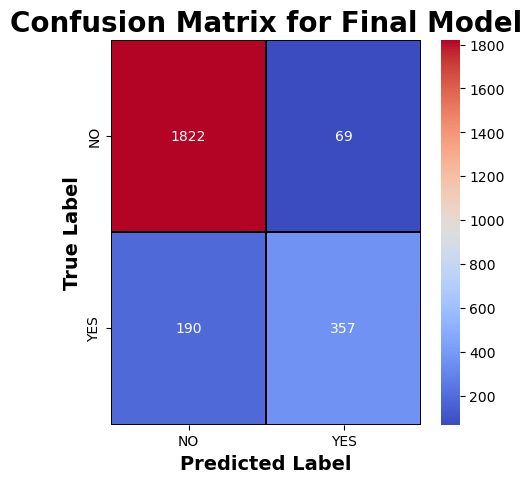

In [85]:
Matrix = confusion_matrix(Y_test, pred)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,5))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="coolwarm", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()

<span style="color:BLUE;font-size: 22px;font-family: verdana;font-weight: bold ">AUC:ROC CURVE</span>

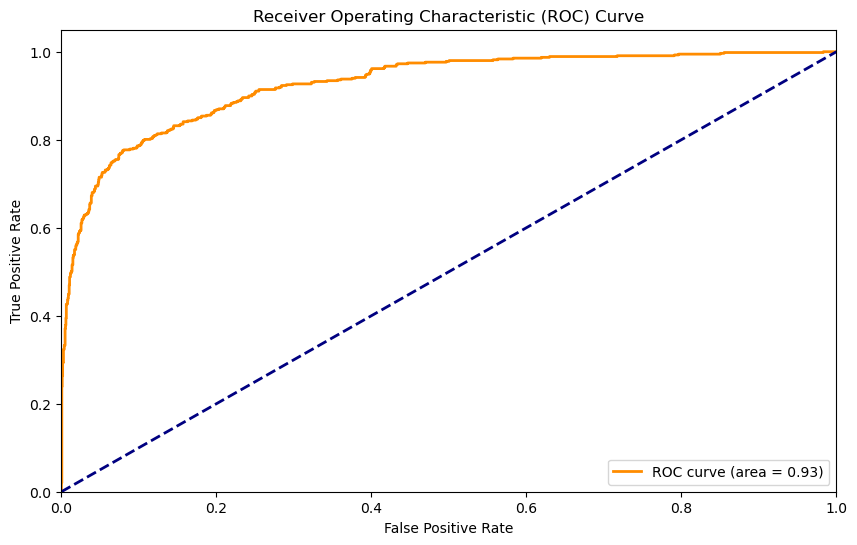

In [86]:
from sklearn.metrics import roc_curve, auc

# Assuming you have true labels (y_true) and predicted probabilities (y_probs) from your model
y_probs = rfc.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">SAVING-FINAL MODEL</SPAN>

In [87]:
import joblib
joblib.dump(rfc,'RainfallForecast.pkl')

['RainfallForecast.pkl']

<span style="color:magenta;font-size: 25px;font-family: verdana;font-weight: bold ">PREDICTION</SPAN>

In [88]:
prediction = rfc.predict(X_test)


In [91]:
Actual = np.array(Y_test)
df_Pred = pd.DataFrame()
df_Pred["Predicted Values"] = prediction
df_Pred["Actual Values"] = Actual
df_Pred.head(30)

,Predicted Values,Actual Values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
5,0,1
6,1,1
7,0,0
8,0,0
9,0,0
